### A Kalman Filter using Numpy. 
##### This KF is for demonstration purposes, running on a simulated set of data. 
##### For your own KF, remove the 'Simulate Measurements' part and input your own data. 

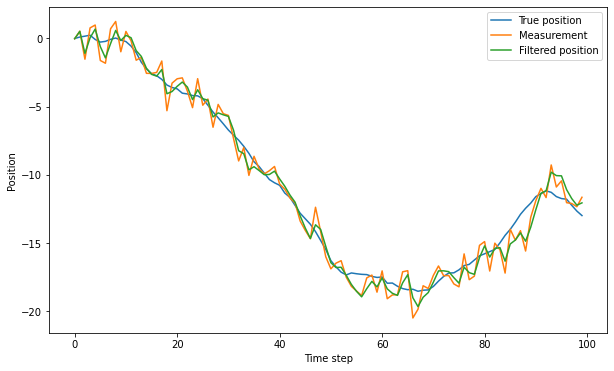

In [1]:
import numpy as np

class KalmanFilter:
    def __init__(self, x, P):
        self.dt = 1  # Time step
        self.A = np.array([[1, self.dt], [0, 1]])  # State transition matrix
        self.H = np.array([[1, 0]])  # Measurement matrix
        self.Q = np.array([[0.1, 0], [0, 0.1]])  # Process noise covariance
        self.R = np.array([[1]])  # Measurement noise covariance
        self.x = x  # Initial state estimate
        self.P = P  # Initial error covariance matrix

    def predict(self):
        # Predict the next state estimate and error covariance matrix
        self.x = np.dot(self.A, self.x)
        self.P = np.dot(np.dot(self.A, self.P), self.A.T) + self.Q

    def update(self, z):
        # Update the state estimate and error covariance matrix with a new measurement
        y = z - np.dot(self.H, self.x)
        S = np.dot(np.dot(self.H, self.P), self.H.T) + self.R
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        self.x = self.x + np.dot(K, y)
        self.P = np.dot(np.eye(2) - np.dot(K, self.H), self.P)

# Initialize the Kalman filter
kf = KalmanFilter(x=np.array([[0], [0]]), P=np.diag([100, 100]))

# Simulate measurements
N = 100
true_states = np.zeros((N, 2))
measurements = np.zeros((N, 1))
for i in range(N):
    # Simulate true position and velocity
    if i == 0:
        true_states[i] = np.array([0, 0])
    else:
        true_states[i] = np.dot(np.array([[1, 1], [0, 1]]), true_states[i-1]) + np.random.normal(loc=0, scale=0.1, size=(2,))
    # Simulate measurement
    measurements[i] = true_states[i, 0] + np.random.normal(loc=0, scale=1, size=(1,))

# Run the Kalman filter on the measurements
filtered_states = np.zeros((N, 2))
for i in range(N):
    kf.predict()
    kf.update(measurements[i])
    filtered_states[i] = kf.x.flatten()

# Plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(true_states[:, 0], label='True position')
plt.plot(measurements[:, 0], label='Measurement')
plt.plot(filtered_states[:, 0], label='Filtered position')
plt.legend()
plt.xlabel('Time step')
plt.ylabel('Position')
plt.show()
